# IMPORTAR LIBRERÍAS

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")



✓ Librerías importadas correctamente


# CARGAR DATOS

In [4]:

# Cargar datasets
df_suicide = pd.read_csv("DATA\crude suicide rates.csv")
df_mental = pd.read_csv("DATA\share-with-alcohol-and-substance-use-disorders 1990-2016.csv")

print("\n📊 DATASETS CARGADOS:")
print(f"✓ Suicidio - Forma: {df_suicide.shape}")
print(f"✓ Salud Mental - Forma: {df_mental.shape}")
print("\n📋 Primeras filas de cada dataset:")
print("\nDataset Suicidio:")
print(df_suicide.head())
print("\nDataset Salud Mental:")
print(df_mental.head())


📊 DATASETS CARGADOS:
✓ Suicidio - Forma: (916, 8)
✓ Salud Mental - Forma: (6156, 4)

📋 Primeras filas de cada dataset:

Dataset Suicidio:
    Unnamed: 0 Unnamed: 1  \
0      Country       Year   
1  Afghanistan       2016   
2  Afghanistan       2015   
3  Afghanistan       2010   
4  Afghanistan       2005   

  Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease  \
0                                         Both sexes                                                                                              
1                                               29.8                                                                                              
2                                               29.8                                                                                              
3                                               31.7                                              

# EXPLORACIÓN INICIAL 
 Análisis de estructura y valores nulos

In [5]:
print("="*100)
print("PASO 2.1: EXPLORACIÓN INICIAL DE DATOS")
print("="*100)

print("\n📊 DATASET SUICIDIO:")
print(f"Forma: {df_suicide.shape} (filas, columnas)")
print(f"\n🔍 Tipos de datos:")
print(df_suicide.dtypes)
print(f"\n❓ Valores nulos por columna:")
print(df_suicide.isnull().sum())
print(f"\n📈 Estadísticas descriptivas:")
print(df_suicide.describe())

print("\n" + "="*100)
print("\n📊 DATASET SALUD MENTAL:")
print(f"Forma: {df_mental.shape} (filas, columnas)")
print(f"\n🔍 Tipos de datos:")
print(df_mental.dtypes)
print(f"\n❓ Valores nulos por columna:")
print(df_mental.isnull().sum())
print(f"\n📈 Estadísticas descriptivas:")
print(df_mental.describe())


PASO 2.1: EXPLORACIÓN INICIAL DE DATOS

📊 DATASET SUICIDIO:
Forma: (916, 8) (filas, columnas)

🔍 Tipos de datos:
Unnamed: 0                                                                                                                                         object
Unnamed: 1                                                                                                                                         object
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease      object
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.1    object
Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease.2    object
Crude suicide rates (per 100 000 population)                                                                         

# LIMPIEZA Y PREPROCESAMIENTO 

 Renombrar columnas y eliminar nulos

In [ ]:
print("\n" + "="*100)
print("LIMPIEZA Y PREPROCESAMIENTO DE DATOS")
print("="*100)

# Limpiar nombres de columnas
df_suicide.columns = df_suicide.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
df_mental.columns = df_mental.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

print(f"\n✓ Columnas renombradas en Dataset Suicidio:")
print(df_suicide.columns.tolist())

print(f"\n✓ Columnas renombradas en Dataset Salud Mental:")
print(df_mental.columns.tolist())

# Verificar valores nulos
print(f"\n❓ Valores nulos ANTES de eliminar:")
print(f"Suicidio: {df_suicide.isnull().sum().sum()}")
print(f"Mental: {df_mental.isnull().sum().sum()}")

# Eliminar valores nulos
df_suicide_clean = df_suicide.dropna()
df_mental_clean = df_mental.dropna()

print(f"\n✓ Valores nulos DESPUÉS de eliminar:")
print(f"Suicidio: {df_suicide_clean.shape[0]} registros (antes: {df_suicide.shape[0]})")
print(f"Mental: {df_mental_clean.shape[0]} registros (antes: {df_mental.shape[0]})")

# Usar el dataset de suicidio como principal
df = df_suicide_clean.copy()

print(f"\n✓ Dataset principal: {df.shape}")
print(f"\n💡 ¿Por qué se hizo esto?")
print(f"  - Limpiar nombres de columnas facilita el manejo")
print(f"  - Eliminar nulos evita errores en cálculos posteriores")
print(f"  - Dataset consistente sin valores faltantes")


LIMPIEZA Y PREPROCESAMIENTO DE DATOS

✓ Columnas renombradas en Dataset Suicidio:
['unnamed:_0', 'unnamed:_1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.2', 'crude_suicide_rates_(per_100_000_population)', 'crude_suicide_rates_(per_100_000_population).1', 'crude_suicide_rates_(per_100_000_population).2']

✓ Columnas renombradas en Dataset Salud Mental:
['entity', 'code', 'year', 'prevalence___alcohol_and_substance_use_disorders:_both_(age_standardized_percent)_(%)']

❓ Valores nulos ANTES de eliminar:
Suicidio: 0
Mental: 864

✓ Valores nulos DESPUÉS de eliminar:
Suicidio: 916 registros (antes: 916)
M

In [7]:
# ==================== CELDA DE DIAGNÓSTICO ====================
# Ejecuta ESTA CELDA PRIMERO para verificar el problema

print("="*100)
print("🔍 DIAGNÓSTICO: Verificar variables")
print("="*100)

# 1. Verificar que df existe
print(f"\n1. ¿Existe df?")
print(f"   {type(df)}")
print(f"   Forma: {df.shape}")

# 2. Verificar todas las columnas
print(f"\n2. Todas las columnas del dataframe:")
print(df.columns.tolist())

# 3. Verificar tipos de datos
print(f"\n3. Tipos de datos:")
print(df.dtypes)

# 4. Seleccionar columnas numéricas correctamente
print(f"\n4. Seleccionando columnas numéricas:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"   Columnas numéricas encontradas: {len(numeric_cols)}")
print(f"   Lista: {numeric_cols}")

# 5. Seleccionar columnas categóricas
print(f"\n5. Seleccionando columnas categóricas:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"   Columnas categóricas encontradas: {len(categorical_cols)}")
print(f"   Lista: {categorical_cols}")

# 6. Verificar si hay datos vacíos
print(f"\n6. Valores nulos por columna:")
print(df.isnull().sum())

# 7. Mostrar primeras filas
print(f"\n7. Primeras filas del dataframe:")
print(df.head())

print("\n" + "="*100)
print("✓ DIAGNÓSTICO COMPLETADO")
print("="*100)
print("\n💡 Si numeric_cols está vacío:")
print("   → Asegúrate de haber ejecutado celdas previas")
print("   → Verifica que df se cargó correctamente")
print("   → Revisa que las columnas tienen tipos numéricos")

🔍 DIAGNÓSTICO: Verificar variables

1. ¿Existe df?
   <class 'pandas.core.frame.DataFrame'>
   Forma: (916, 8)

2. Todas las columnas del dataframe:
['unnamed:_0', 'unnamed:_1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.2', 'crude_suicide_rates_(per_100_000_population)', 'crude_suicide_rates_(per_100_000_population).1', 'crude_suicide_rates_(per_100_000_population).2']

3. Tipos de datos:
unnamed:_0                                                                                                                                         object
unnamed:_1                                                   

In [8]:
# ====== CELDA NUEVA: CONVERTIR COLUMNAS A NUMÉRICAS ======
# Copia y ejecuta ESTO en una nueva celda

import pandas as pd
import numpy as np

# 1. Convertir a numéricas
numeric_cols_to_convert = [
    'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease',
    'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.1',
    'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.2',
    'crude_suicide_rates_(per_100_000_population)',
    'crude_suicide_rates_(per_100_000_population).1',
    'crude_suicide_rates_(per_100_000_population).2'
]

for col in numeric_cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Eliminar nulos que creó la conversión
df = df.dropna()

# 3. Verificar
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"✓ Columnas numéricas: {len(numeric_cols)}")
print(f"  {numeric_cols}")
print(f"✓ Total registros: {len(df)}")

✓ Columnas numéricas: 6
  ['probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.2', 'crude_suicide_rates_(per_100_000_population)', 'crude_suicide_rates_(per_100_000_population).1', 'crude_suicide_rates_(per_100_000_population).2']
✓ Total registros: 915


#  IDENTIFICAR VARIABLES
 Separar variables numéricas y categóricas

In [9]:

print("\n" + "="*100)
print("PASO 2.2: ANÁLISIS UNIVARIANTE")
print("="*100)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📈 Variables Numéricas ({len(numeric_cols)}):")
print(numeric_cols)

print(f"\n📝 Variables Categóricas ({len(categorical_cols)}):")
print(categorical_cols)




PASO 2.2: ANÁLISIS UNIVARIANTE

📈 Variables Numéricas (6):
['probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.1', 'probability_(%)_of_dying_between_age_30_and_exact_age_70_from_any_of_cardiovascular_disease,_cancer,_diabetes,_or_chronic_respiratory_disease.2', 'crude_suicide_rates_(per_100_000_population)', 'crude_suicide_rates_(per_100_000_population).1', 'crude_suicide_rates_(per_100_000_population).2']

📝 Variables Categóricas (2):
['unnamed:_0', 'unnamed:_1']


#  ESTADÍSTICAS UNIVARIANTES 
Análisis detallado de cada variable

In [17]:
print("\n" + "-"*100)
print("ESTADÍSTICAS DETALLADAS - VARIABLES NUMÉRICAS")
print("-"*100)

for col in numeric_cols:
    print(f"\n📊 {col.upper()}:")
    print(f"  Media:         {df[col].mean():.4f}")
    print(f"  Mediana:       {df[col].median():.4f}")
    print(f"  Desv. Estándar: {df[col].std():.4f}")
    print(f"  Mínimo:        {df[col].min():.4f}")
    print(f"  Máximo:        {df[col].max():.4f}")
    print(f"  Q1 (25%):      {df[col].quantile(0.25):.4f}")
    print(f"  Q3 (75%):      {df[col].quantile(0.75):.4f}")
    print(f"  Rango IQR:     {df[col].quantile(0.75) - df[col].quantile(0.25):.4f}")

print("\n" + "-"*100)
print("ESTADÍSTICAS - VARIABLES CATEGÓRICAS")
print("-"*100)

for col in categorical_cols:
    print(f"\n📝 {col.upper()} - Frecuencias:")
    print(df[col].value_counts().head(10))




----------------------------------------------------------------------------------------------------
ESTADÍSTICAS DETALLADAS - VARIABLES NUMÉRICAS
----------------------------------------------------------------------------------------------------

📊 PROBABILITY_(%)_OF_DYING_BETWEEN_AGE_30_AND_EXACT_AGE_70_FROM_ANY_OF_CARDIOVASCULAR_DISEASE,_CANCER,_DIABETES,_OR_CHRONIC_RESPIRATORY_DISEASE:
  Media:         20.5849
  Mediana:       20.8000
  Desv. Estándar: 5.9529
  Mínimo:        7.8000
  Máximo:        39.1000
  Q1 (25%):      16.4000
  Q3 (75%):      24.7000
  Rango IQR:     8.3000

📊 PROBABILITY_(%)_OF_DYING_BETWEEN_AGE_30_AND_EXACT_AGE_70_FROM_ANY_OF_CARDIOVASCULAR_DISEASE,_CANCER,_DIABETES,_OR_CHRONIC_RESPIRATORY_DISEASE.1:
  Media:         23.7097
  Mediana:       22.7000
  Desv. Estándar: 7.3601
  Mínimo:        9.9000
  Máximo:        51.7000
  Q1 (25%):      18.4000
  Q3 (75%):      28.4000
  Rango IQR:     10.0000

📊 PROBABILITY_(%)_OF_DYING_BETWEEN_AGE_30_AND_EXACT_AGE_70_

# VISUALIZAR DISTRIBUCIONES 
Histogramas para variables numéricas

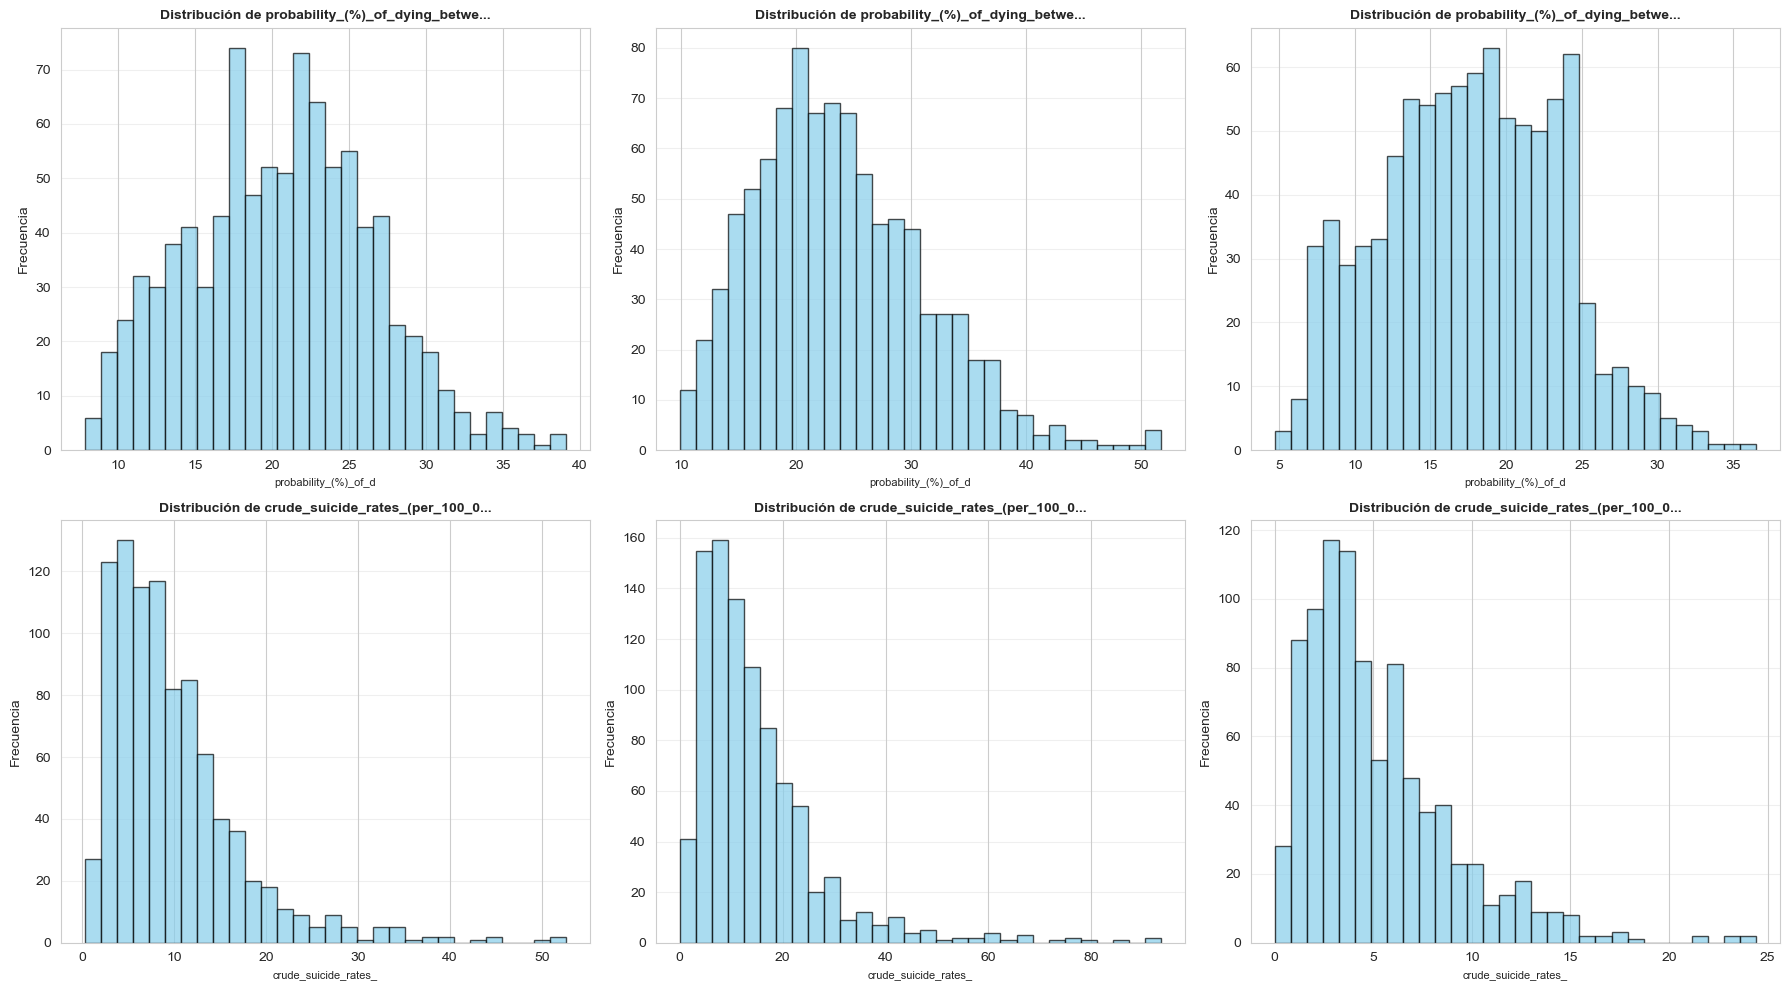

✓ Gráfica guardada


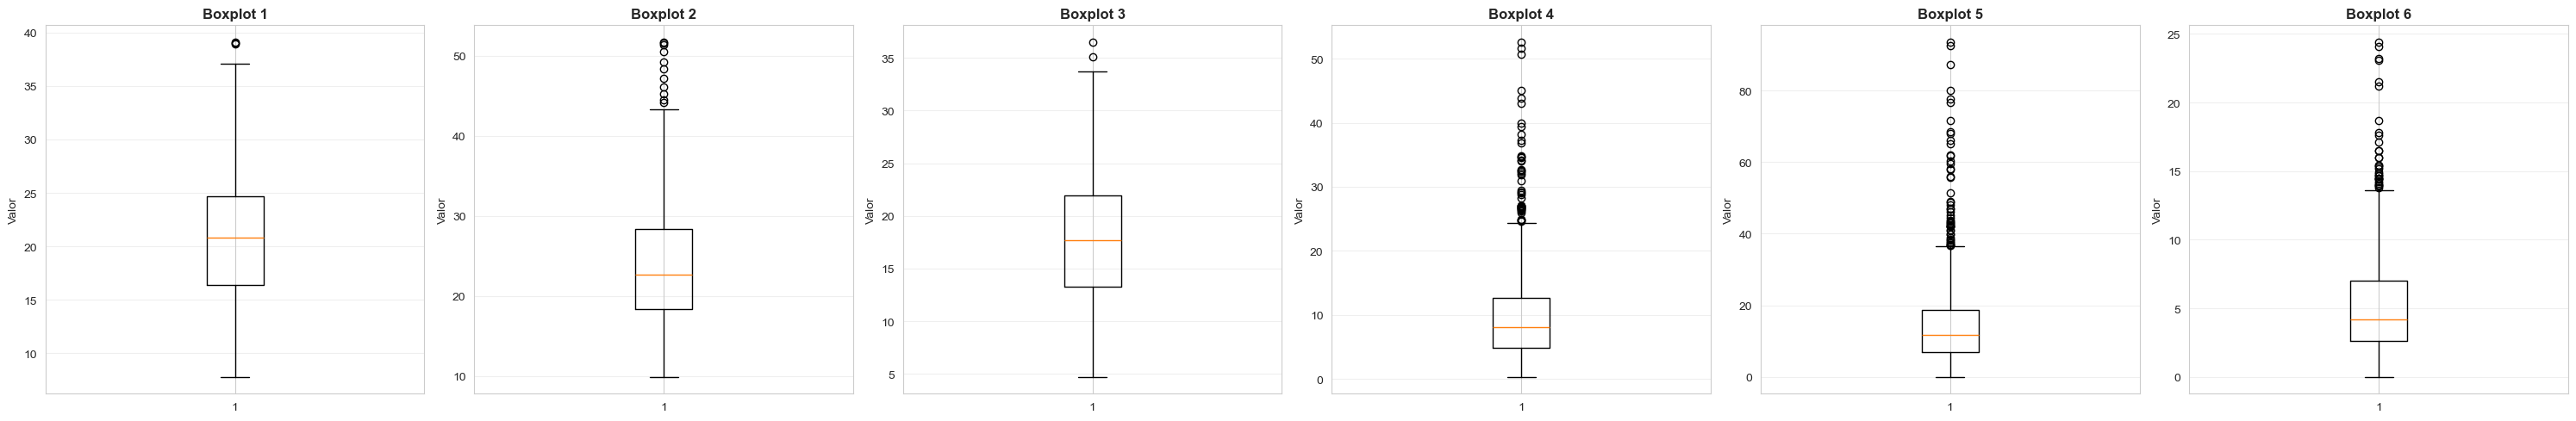

✓ Boxplots guardados

ESTADÍSTICAS UNIVARIANTES

probability_(%)_of_dying_between_age_30_and_exact_...
  Media: 20.58
  Mediana: 20.80
  Desv.Est: 5.95
  Min: 7.80 | Max: 39.10
  Outliers: 3 (0.3%)

probability_(%)_of_dying_between_age_30_and_exact_...
  Media: 23.71
  Mediana: 22.70
  Desv.Est: 7.36
  Min: 9.90 | Max: 51.70
  Outliers: 11 (1.2%)

probability_(%)_of_dying_between_age_30_and_exact_...
  Media: 17.64
  Mediana: 17.70
  Desv.Est: 5.85
  Min: 4.70 | Max: 36.50
  Outliers: 2 (0.2%)

crude_suicide_rates_(per_100_000_population)...
  Media: 9.94
  Mediana: 8.10
  Desv.Est: 7.27
  Min: 0.30 | Max: 52.60
  Outliers: 43 (4.7%)

crude_suicide_rates_(per_100_000_population).1...
  Media: 14.80
  Mediana: 11.70
  Desv.Est: 12.24
  Min: 0.00 | Max: 93.50
  Outliers: 50 (5.5%)

crude_suicide_rates_(per_100_000_population).2...
  Media: 5.23
  Mediana: 4.20
  Desv.Est: 3.75
  Min: 0.00 | Max: 24.40
  Outliers: 32 (3.5%)


In [11]:
# ====== HISTOGRAMAS ======
import matplotlib.pyplot as plt

n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'Distribución de {col[:30]}...', fontweight='bold', fontsize=10)
    axes[idx].set_xlabel(col[:20], fontsize=8)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('results/01_distribuciones.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Gráfica guardada")


# ====== BOXPLOTS ======
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(5*len(numeric_cols), 5))
if len(numeric_cols) == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col])
    axes[idx].set_title(f'Boxplot {idx+1}', fontweight='bold')
    axes[idx].set_ylabel('Valor')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('results/02_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Boxplots guardados")


# ====== ESTADÍSTICAS ======
print("\n" + "="*80)
print("ESTADÍSTICAS UNIVARIANTES")
print("="*80)

for col in numeric_cols:
    print(f"\n{col[:50]}...")
    print(f"  Media: {df[col].mean():.2f}")
    print(f"  Mediana: {df[col].median():.2f}")
    print(f"  Desv.Est: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f} | Max: {df[col].max():.2f}")
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)).sum()
    print(f"  Outliers: {outliers} ({outliers/len(df)*100:.1f}%)")

In [ ]:

# ==================== CELDA 8: BOXPLOTS - DETECTAR OUTLIERS ====================
# Visualizar outliers con boxplots

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(5*len(numeric_cols), 5))
axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col])
    axes[idx].set_title(f'Boxplot de {col}', fontweight='bold')
    axes[idx].set_ylabel('Valor')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('results/02_boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Gráfica guardada: results/02_boxplots_outliers.png")


# ==================== CELDA 9: DEDUCCIONES UNIVARIANTES ====================
# Interpretación de resultados

print("\n" + "="*100)
print("💡 DEDUCCIONES DEL ANÁLISIS UNIVARIANTE")
print("="*100)

for col in numeric_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    
    print(f"\n📊 {col.upper()}:")
    print(f"  - El promedio es {mean_val:.2f} con desviación de {std_val:.2f}")
    print(f"  - El 50% de los datos está por debajo de {median_val:.2f}")
    print(f"  - Rango: [{df[col].min():.2f}, {df[col].max():.2f}]")
    
    # Detectar sesgo
    if abs(mean_val - median_val) > std_val * 0.5:
        print(f"  - La distribución tiene sesgo (media ≠ mediana)")
    else:
        print(f"  - La distribución es relativamente simétrica")
    
    # Verificar outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)).sum()
    print(f"  - Outliers detectados: {outliers} ({outliers/len(df)*100:.2f}%)")

In [ ]:
# ==================== CELDA 10: FILTRADO DE OUTLIERS (IQR) ====================
# Usar método de Intercuartiles para eliminar valores extremos

print("\n" + "="*100)
print("PASO 2.3: FILTRADO DE OUTLIERS - MÉTODO IQR")
print("="*100)

# Seleccionar variable objetivo (la primera variable numérica)
target_col = numeric_cols[0] if numeric_cols else None

if target_col:
    print(f"\n🎯 Variable Objetivo Seleccionada: {target_col}")
    
    # Registros antes de filtrado
    n_before = len(df)
    
    # Calcular límites IQR para cada variable numérica
    df_filtered = df.copy()
    
    total_removed = 0
    removal_details = {}
    
    for col in numeric_cols:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Contar outliers antes de eliminar
        outliers_in_col = ((df_filtered[col] < lower_bound) | (df_filtered[col] > upper_bound)).sum()
        
        # Filtrar
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
        
        removal_details[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outliers': outliers_in_col
        }
    
    n_after = len(df_filtered)
    total_removed = n_before - n_after
    
    print(f"\n📊 DETALLES DEL FILTRADO:")
    print(f"  Registros ANTES: {n_before}")
    print(f"  Registros DESPUÉS: {n_after}")
    print(f"  Registros ELIMINADOS: {total_removed} ({total_removed/n_before*100:.2f}%)")
    
    print(f"\n📋 Límites IQR por variable:")
    for col, details in removal_details.items():
        print(f"\n  {col}:")
        print(f"    Q1: {details['Q1']:.4f}, Q3: {details['Q3']:.4f}, IQR: {details['IQR']:.4f}")
        print(f"    Límites: [{details['lower_bound']:.4f}, {details['upper_bound']:.4f}]")
        print(f"    Outliers en esta variable: {details['outliers']}")
    
    # Actualizar df con datos filtrados
    df = df_filtered.copy()
    
    print(f"\n💡 ¿POR QUÉ SE REALIZA ESTE FILTRADO?")
    print(f"  - Los outliers extremos distorsionan modelos de ML")
    print(f"  - El método IQR es estándar y robusto")
    print(f"  - Mantiene datos representativos y coherentes")
    print(f"  - Mejora la calidad del clustering posterior")
else:
    print("\n⚠ No hay variables numéricas para filtrar")


# ==================== CELDA 11: COMPARAR ANTES Y DESPUÉS ====================
# Visualizar el efecto del filtrado

# Recargar datos originales para comparar
df_original = df_suicide_clean.copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, col in enumerate(numeric_cols[:2]):  # Mostrar primeras 2 variables
    ax = axes[idx]
    
    ax.hist(df_original[col], bins=30, alpha=0.5, label='Datos Originales', color='red', edgecolor='black')
    ax.hist(df[col], bins=30, alpha=0.5, label='Datos Filtrados', color='green', edgecolor='black')
    
    ax.set_title(f'Comparación: {col} (Antes vs Después)', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('results/03_filtrado_outliers_comparacion.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Gráfica guardada: results/03_filtrado_outliers_comparacion.png")

In [ ]:
# ==================== CELDA 12: ANÁLISIS BIVARIANTE ====================
# Relaciones entre variables

print("\n" + "="*100)
print("PASO 2.4: ANÁLISIS BIVARIANTE")
print("="*100)

if len(numeric_cols) >= 2:
    # Scatter plots entre variables numéricas
    n_vars = min(len(numeric_cols), 4)
    n_rows = (n_vars * (n_vars - 1) // 2 + 2) // 3
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    plot_idx = 0
    for i in range(len(numeric_cols) - 1):
        for j in range(i + 1, len(numeric_cols)):
            if plot_idx < 4:
                ax = axes[plot_idx]
                ax.scatter(df[numeric_cols[i]], df[numeric_cols[j]], alpha=0.6, s=30)
                ax.set_xlabel(numeric_cols[i])
                ax.set_ylabel(numeric_cols[j])
                ax.set_title(f'{numeric_cols[i]} vs {numeric_cols[j]}', fontweight='bold')
                ax.grid(True, alpha=0.3)
                plot_idx += 1
    
    # Eliminar subplots no usados
    for idx in range(plot_idx, len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.savefig('results/04_analisis_bivariante.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✓ Gráfica guardada: results/04_analisis_bivariante.png")


# ==================== CELDA 13: CREAR VARIABLE OBJETIVO BINARIA ====================
# Para clasificación: dividir en "Alto" y "Bajo"

print("\n" + "="*100)
print("PASO 2.5: CREAR VARIABLE OBJETIVO (REGRESIÓN + CLASIFICACIÓN)")
print("="*100)

if target_col:
    # Para REGRESIÓN: mantener variable original
    print(f"\n📈 REGRESIÓN:")
    print(f"  Variable Objetivo: {target_col} (continua)")
    print(f"  Rango: [{df[target_col].min():.2f}, {df[target_col].max():.2f}]")
    print(f"  Media: {df[target_col].mean():.2f}")
    
    # Para CLASIFICACIÓN: crear variable binaria
    print(f"\n📊 CLASIFICACIÓN:")
    median_val = df[target_col].median()
    df['target_binaria'] = (df[target_col] > median_val).astype(int)
    df['target_categoria'] = df['target_binaria'].map({0: 'BAJO', 1: 'ALTO'})
    
    print(f"  Punto de corte (mediana): {median_val:.2f}")
    print(f"  Clase 0 (BAJO): ≤ {median_val:.2f}")
    print(f"  Clase 1 (ALTO): > {median_val:.2f}")
    
    print(f"\n  Distribución de clases:")
    value_counts = df['target_categoria'].value_counts()
    print(value_counts)
    print(f"\n  Proporción:")
    for cat, count in value_counts.items():
        print(f"    {cat}: {count/len(df)*100:.1f}%")


# ==================== CELDA 14: MATRIZ DE CORRELACIÓN ====================
# Calcular correlaciones entre variables

print("\n" + "="*100)
print("PASO 2.6: MATRIZ DE CORRELACIÓN")
print("="*100)

# Seleccionar solo variables numéricas
df_numeric = df[numeric_cols].copy()

# Calcular matriz de correlación
correlation_matrix = df_numeric.corr()

print(f"\n📊 MATRIZ DE CORRELACIÓN:")
print(correlation_matrix)

# Visualizar con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('results/05_matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Gráfica guardada: results/05_matriz_correlacion.png")

# Identificar correlaciones altas
print(f"\n🔗 CORRELACIONES ALTAS (> 0.7 o < -0.7):")
high_corr_found = False
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"  {correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_val:.3f}")
            high_corr_found = True

if not high_corr_found:
    print("  No se encontraron correlaciones altas")

print(f"\n💡 DEDUCCIONES:")
print(f"  - Revisar qué variables están altamente correlacionadas")
print(f"  - Evitar multicolinealidad: mantener variable más relevante")
print(f"  - Las bajas correlaciones con el objetivo pueden no ser predictivas")

In [ ]:
# ==================== CELDA 15: NORMALIZACIÓN DE DATOS ====================
# Preparar datos para clustering

print("\n" + "="*100)
print("NORMALIZACIÓN DE DATOS")
print("="*100)

# Seleccionar características para normalizar
X = df[numeric_cols].copy()

print(f"\n📊 Datos antes de normalizar:")
print(f"  Forma: {X.shape}")
print(f"  Media: {X.mean().values}")
print(f"  Desv. Est: {X.std().values}")

# Normalizar usando StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

print(f"\n✓ Datos después de normalizar:")
print(f"  Media: {X_normalized.mean(axis=0)}")
print(f"  Desv. Est: {X_normalized.std(axis=0)}")

# Crear dataframe normalizado
X_normalized_df = pd.DataFrame(X_normalized, columns=numeric_cols, index=X.index)

print(f"\n💡 ¿POR QUÉ NORMALIZAR?")
print(f"  - K-Means usa distancia euclidiana")
print(f"  - Variables con diferentes escalas distorsionan la distancia")
print(f"  - Normalizar lleva todo a escala común [~-3, +3]")


# ==================== CELDA 16: DIVISIÓN TRAIN/TEST ====================
# Dividir datos en 80% entrenamiento y 20% validación

print("\n" + "="*100)
print("PASO 2.7: DIVISIÓN TRAIN/TEST (80/20)")
print("="*100)

# Crear X e y para división
X = df[numeric_cols].copy()
y = df['target_binaria'].copy() if 'target_binaria' in df.columns else pd.Series(np.zeros(len(df)))

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\n📊 DIVISIÓN DE DATOS:")
print(f"  Total: {len(X)} registros")
print(f"  Train: {len(X_train)} registros ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Test: {len(X_test)} registros ({len(X_test)/len(X)*100:.1f}%)")

# Verificar proporciones
print(f"\n✓ PROPORCIÓN DE CLASES EN TRAIN:")
train_props = y_train.value_counts(normalize=True)
for class_val, prop in train_props.items():
    print(f"  Clase {class_val}: {prop*100:.1f}%")

print(f"\n✓ PROPORCIÓN DE CLASES EN TEST:")
test_props = y_test.value_counts(normalize=True)
for class_val, prop in test_props.items():
    print(f"  Clase {class_val}: {prop*100:.1f}%")

# Tabla comparativa
print(f"\n📋 COMPARACIÓN PROPORCIONES:")
comparison_df = pd.DataFrame({
    'Train': train_props,
    'Test': test_props
})
print(comparison_df)

# Verificar balance
print(f"\n💡 VERIFICACIÓN:")
if abs((train_props - test_props).abs().max()) < 0.05:
    print(f"  ✓ EXCELENTE: Proporciones se mantienen (diferencia < 5%)")
else:
    print(f"  ⚠ Proporciones tienen diferencia")


# ==================== CELDA 17: GUARDAR DATASETS ====================
# Exportar train.csv y test.csv

print("\n" + "="*100)
print("GUARDANDO DATASETS")
print("="*100)

# Combinar X e y para guardar
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# Agregar variable de categoría
if 'target_binaria' in df.columns:
    train_data['target_categoria'] = train_data['target_binaria'].map({0: 'BAJO', 1: 'ALTO'})
    test_data['target_categoria'] = test_data['target_binaria'].map({0: 'BAJO', 1: 'ALTO'})

# Guardar
train_data.to_csv('data/processed/train.csv', index=False)
test_data.to_csv('data/processed/test.csv', index=False)

print(f"\n✓ train.csv guardado:")
print(f"  Forma: {train_data.shape}")
print(f"  Ubicación: data/processed/train.csv")

print(f"\n✓ test.csv guardado:")
print(f"  Forma: {test_data.shape}")
print(f"  Ubicación: data/processed/test.csv")

# Guardar dataset completo procesado
df_complete = df.copy()
df_complete[numeric_cols] = X_normalized_df
df_complete.to_csv('data/processed/datos_procesados_completos.csv', index=False)

print(f"\n✓ datos_procesados_completos.csv guardado:")
print(f"  Forma: {df_complete.shape}")
print(f"  (contiene datos normalizados)")


# ==================== CELDA 18: RESUMEN FINAL ====================
# Resumen de todo el EDA

print("\n" + "="*100)
print("✅ ANÁLISIS EXPLORATORIO DE DATOS (EDA) COMPLETADO")
print("="*100)

print(f"\n📊 RESUMEN EJECUTIVO:")
print(f"\n1. EXPLORACIÓN:")
print(f"   - Dataset original: {len(df_original)} registros")
print(f"   - Valores nulos: Eliminados")
print(f"   - Variables numéricas: {len(numeric_cols)}")
print(f"   - Variables categóricas: {len(categorical_cols)}")

print(f"\n2. FILTRADO:")
print(f"   - Outliers eliminados: {len(df_original) - len(df)} ({(len(df_original)-len(df))/len(df_original)*100:.1f}%)")
print(f"   - Datos limpios: {len(df)} registros")

print(f"\n3. VARIABLES:")
print(f"   - Objetivo (Regresión): {target_col}")
print(f"   - Objetivo (Clasificación): target_binaria")

print(f"\n4. DIVISIÓN:")
print(f"   - Train: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"   - Test: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

print(f"\n5. ARCHIVOS GENERADOS:")
print(f"   ✓ data/processed/train.csv")
print(f"   ✓ data/processed/test.csv")
print(f"   ✓ data/processed/datos_procesados_completos.csv")
print(f"   ✓ results/01_distribuciones_univariantes.png")
print(f"   ✓ results/04_analisis_bivariante.png")
print(f"   ✓ results/05_matriz_correlacion.png")

print(f"\n🎯 PRÓXIMO PASO: Clustering con K-Means")